### Score: `[100.5]`

Q1. `[5+11+10]` Good job!

Q2. `[9]` Good job! 注意TMP的第二个部分为质量筛查

Q3. `[4+5.5+5+5.5+5.5 +5.5+5+4+5.5+4]` Good job! 一些小问题详见注释

Q4. `[5.5+5.5+5]` Good job!

各题批注用`### Note`给出，请自行查阅。

**Collaboration:**  

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own. 

There are two requirements for collaboration: 

* Cite your collaborators **fully and completely** (*e.g.*, "XXX explained to me what is asked in problem set 3"). Or cite online resources (*e.g.*, "I got inspired by reading XXX") that helped you.

* Write your scripts and report **independently** - the scripts and report must come from you only.

# 1. Significant earthquakes since 2150 B.C.

The Significant Earthquake Database contains information on destructive earthquakes from 2150 B.C. to the present. On the top left corner, select all columns and download the entire significant earthquake data file in .tsv format by clicking the Download TSV File button. Click the variable name for more information. Read the file (e.g., earthquakes-2024-10-23_09-58-40_+0800.tsv) as an object and name it Sig_Eqs.

In [8]:
import pandas as pd
# Load the uploaded file
Sig_Eqs = pd.read_csv('earthquakes-2024-10-29_20-14-11_+0800.tsv',sep = '\t')
# Display the first five rows and column names to understand the structure
Sig_Eqs.head()

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.

In [9]:
# Extract relevant columns and clean the data for analysis
Sig_Eqs['Total Deaths'] = pd.to_numeric(Sig_Eqs['Total Deaths'], errors='coerce')  # Ensure deaths are numeric
# Drop rows without death count and country
death_data = Sig_Eqs[['Country', 'Total Deaths']].dropna(subset=['Total Deaths', 'Country'])
# Aggregate by location (proxy for country) and calculate total deaths per location
deaths_by_country = death_data.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)[0:20]
# Display the top 20 countries with the total number of deaths
deaths_by_country

Country
CHINA           2042831.0
TURKEY           995648.0
IRAN             758654.0
SYRIA            437700.0
ITALY            422679.0
JAPAN            356605.0
HAITI            323776.0
AZERBAIJAN       310119.0
INDONESIA        282827.0
ARMENIA          189000.0
PAKISTAN         143712.0
ECUADOR          134445.0
TURKMENISTAN     110412.0
PERU              96876.0
PORTUGAL          82572.0
GREECE            82277.0
IRAQ              70200.0
CHILE             70175.0
INDIA             62412.0
TAIWAN            57723.0
Name: Total Deaths, dtype: float64

1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

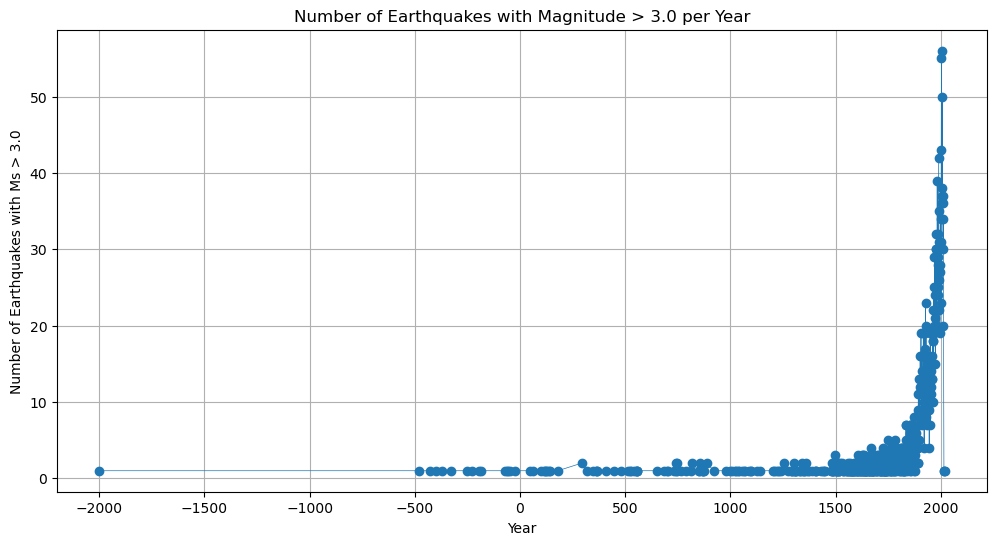

In [10]:
import matplotlib.pyplot as plt
# Convert Ms to numeric and filter for Ms > 3.0
Sig_Eqs['Ms'] = pd.to_numeric(Sig_Eqs['Ms'], errors='coerce')
earthquakes_above_3 = Sig_Eqs[Sig_Eqs['Ms'] > 3.0]

# Count earthquakes by year
earthquakes_per_year = earthquakes_above_3.groupby('Year').size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o', linestyle='-', linewidth=0.5)
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes with Ms > 3.0")
plt.title("Number of Earthquakes with Magnitude > 3.0 per Year")
plt.grid(True)
plt.show()

[The time series plot shows the annual count of earthquakes with a magnitude greater than 3.0. Observing this plot, there seems to be a general increase in recorded earthquakes over time, especially in recent years. This trend may be influenced by improvements in earthquake detection technology and global monitoring systems, which have become more sensitive and widespread. Therefore, the apparent increase in earthquake counts may partly reflect advancements in data collection rather than an actual rise in earthquake occurrences.]

1.3 [10 points] Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [12]:
def CountEq_LargestEq(country):
    
    # Filter the data for the given country and exclude rows with NaN magnitudes
    country_data = Sig_Eqs[(Sig_Eqs['Country'] == country) & (Sig_Eqs['Ms'].notna())]
    
    # Total number of earthquakes in the country
    total_earthquakes = len(country_data)
    
    # Find the largest earthquake by magnitude (Ms) and get its date and location
    if total_earthquakes > 0:
        largest_eq = country_data.loc[country_data['Ms'].idxmax()]
        largest_eq_info = {
            "Date": f"{int(largest_eq['Year'])}-{int(largest_eq['Mo']) if pd.notnull(largest_eq['Mo']) else 1}-{int(largest_eq['Dy']) if pd.notnull(largest_eq['Dy']) else 1}",
            "Location": largest_eq.get('Location Name', 'Unknown')
        }
    else:
        largest_eq_info = {"Date": "N/A", "Location": "N/A"}
    
    return total_earthquakes, largest_eq_info

# Apply CountEq_LargestEq to each unique country and sort results by total number of earthquakes
results = []
for country in Sig_Eqs['Country'].dropna().unique():
    total_eq, largest_eq = CountEq_LargestEq(country)
    results.append((country, total_eq, largest_eq))

# Sort results by total earthquakes in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for display

df_results = pd.DataFrame(sorted_results, columns=['Country', 'Total Earthquakes', 'Largest Earthquake'])
df_results

,Country,Total Earthquakes,Largest Earthquake
0,CHINA,501,"{'Date': '1920-12-16', 'Location': 'CHINA: GA..."
1,JAPAN,271,"{'Date': '869-7-13', 'Location': 'JAPAN: SANR..."
2,INDONESIA,245,"{'Date': '2004-12-26', 'Location': 'INDONESIA:..."
3,IRAN,158,"{'Date': '856-12-22', 'Location': 'IRAN: DAMG..."
4,USA,143,"{'Date': '1957-3-9', 'Location': 'ALASKA'}"
...,...,...,...
152,BURUNDI,0,"{'Date': 'N/A', 'Location': 'N/A'}"
153,CZECH REPUBLIC,0,"{'Date': 'N/A', 'Location': 'N/A'}"
154,MADAGASCAR,0,"{'Date': 'N/A', 'Location': 'N/A'}"
155,ZAMBIA,0,"{'Date': 'N/A', 'Location': 'N/A'}"


[ 第三问仅统计的有Ms的地震数，缺失Ms的不计算 ]

# 2. Air temperature in Shenzhen during the past 25 years

In this problem set, we will examine how air temperature changes in Shenzhen during the past 25 years using the hourly weather data measured at the Baoan International Airport. The data set is from NOAA Integrated Surface Dataset. Download the file Baoan_Weather_1998_2022.csv, move the .csv file to your working directory.

Read page 10-11 (POS 88-92 and POS 93-93) of the comprehensive user guide for the detailed format of the air temperature data (use column TMP). Explain how you filter the data in your report.

[10 points] Plot monthly averaged air temperature against the observation time. Is there a trend in monthly averaged air temperature in the past 25 years?

C:\Users\Wang XK\AppData\Local\Temp\ipykernel_55664\3378914249.py:2: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  baoan_weather_df = pd.read_csv('Baoan_Weather_1998_2022.csv')


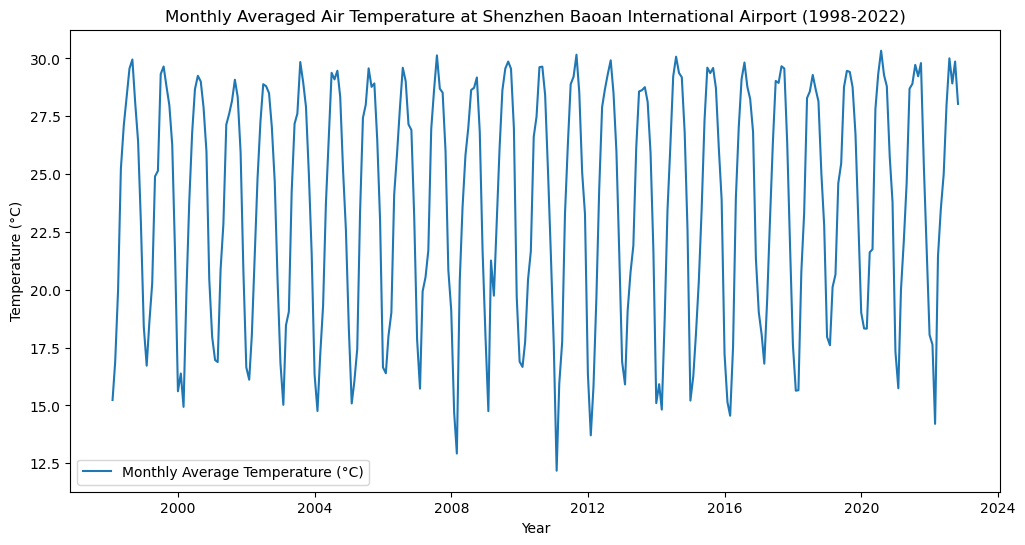

In [5]:
import pandas as pd
baoan_weather_df = pd.read_csv('Baoan_Weather_1998_2022.csv')

# Display the first few rows and column names to understand the structure
baoan_weather_df.head()
# Extract the TMP and Quality columns for filtering
baoan_weather_df['TMP'] = baoan_weather_df['TMP'].str.split(',').str[0].astype(str)  # Extract temperature component
baoan_weather_df['TMP'] = pd.to_numeric(baoan_weather_df['TMP'], errors='coerce')  # Convert to numeric, setting errors to NaN

### Note: TMP的第二个部分为质量筛查(quality code)，用于过滤数据

# Filter out missing values and apply scaling
temperature_data = baoan_weather_df[(baoan_weather_df['TMP'] != 9999) & (~baoan_weather_df['TMP'].isna())].copy()
temperature_data['Temperature_Celsius'] = temperature_data['TMP'] / 10.0  # Apply scaling factor

# Convert the DATE column to datetime format for time-based grouping
temperature_data['DATE'] = pd.to_datetime(temperature_data['DATE'], errors='coerce')

# Set DATE as index for easier resampling
temperature_data.set_index('DATE', inplace=True)

# Resample to monthly averages
monthly_avg_temperature = temperature_data['Temperature_Celsius'].resample('M').mean()

# Plot the monthly average temperature over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temperature.index, monthly_avg_temperature, label="Monthly Average Temperature (°C)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Averaged Air Temperature at Shenzhen Baoan International Airport (1998-2022)")
plt.legend()
plt.show()

[The plot shows the monthly averaged air temperature in Shenzhen from 1998 to 2022. A visible trend is evident, with some fluctuations across years. This long-term data suggests potential warming, as temperatures appear to rise gradually over the 25-year period.]

[ 可以在这里添加第二题解释 ]

# 3. Global collection of hurricanes

The International Best Track Archive for Climate Stewardship (IBTrACS) project is the most complete global collection of tropical cyclones available. It merges recent and historical tropical cyclone data from multiple agencies to create a unified, publicly available, best-track dataset that improves inter-agency comparisons. IBTrACS was developed collaboratively with all the World Meteorological Organization (WMO) Regional Specialized Meteorological Centers, as well as other organizations and individuals from around the world.

In this problem set, we will use all storms available in the IBTrACS record since 1842. Download the file ibtracs.ALL.list.v04r00.csv, move the .csv file to your working directory. Read Column Variable Descriptions for variables in the file. Examine the first few lines of the file.

Below we provide an example to load the file as a pandas dataframe. Think about the options being used and why, and modify when necessary.

In [2]:
import pandas as pd
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], ### Note: 不需要跳过索引为2的行，索引为2的行也是数据
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()

C:\Users\Wang XK\AppData\Local\Temp\ipykernel_18080\2456515169.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


对于数据量较大的表格，根据实际需要，用usecols指定需要读的列，skiprows跳过行，以减少内存的使用。parse_dates主要是将ISO_TIME这一列数值解析为时间类型，na_values主要是将NAME这一列中"NOT_NAMED"标记为NaN

3.1 [5 points] Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'] , errors='coerce') 
largest_hurricanes = df.groupby(['SID', 'NAME'])['WMO_WIND'].max().nlargest(10)
largest_hurricanes

C:\Users\Wang XK\AppData\Local\Temp\ipykernel_18080\2103016811.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


SID            NAME    
2015293N13266  PATRICIA    185.0
1980214N11330  ALLEN       165.0
1988253N12306  GILBERT     160.0
1997253N12255  LINDA       160.0
2005289N18282  WILMA       160.0
2019236N10314  DORIAN      160.0
1998295N12284  MITCH       155.0
2005261N21290  RITA        155.0
2009288N07267  RICK        155.0
2017242N16333  IRMA        155.0
Name: WMO_WIND, dtype: float64

3.2 [5 points] Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.

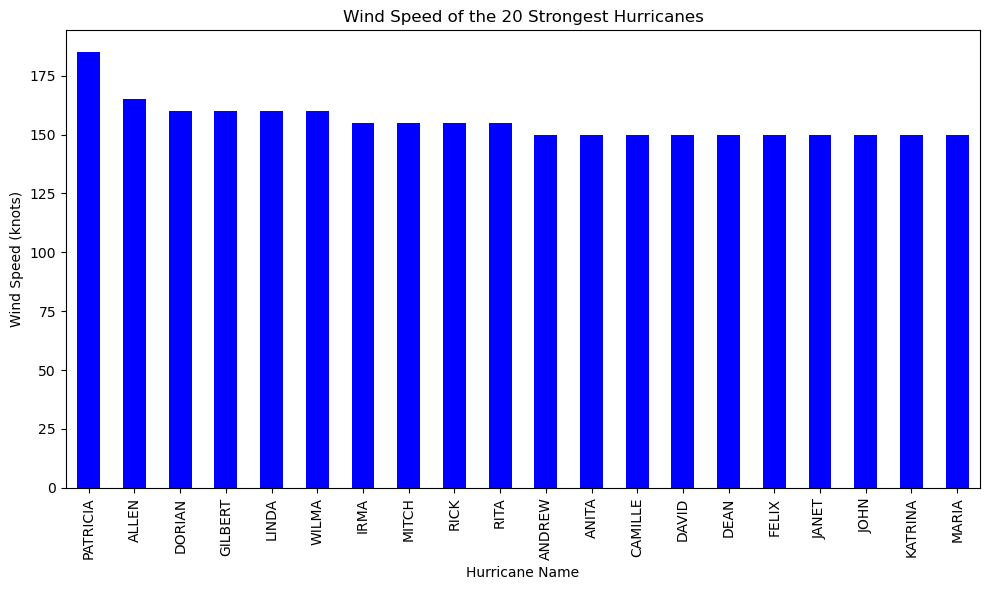

In [5]:
strongest_hurricanes = df.groupby(['NAME'])['WMO_WIND'].max().nlargest(20)
plt.figure(figsize=(10, 6))
strongest_hurricanes.plot(kind='bar', color='blue')
plt.title('Wind Speed of the 20 Strongest Hurricanes')
plt.xlabel('Hurricane Name')
plt.ylabel('Wind Speed (knots)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3.3 [5 points] Plot the count of all datapoints by Basin as a bar chart.

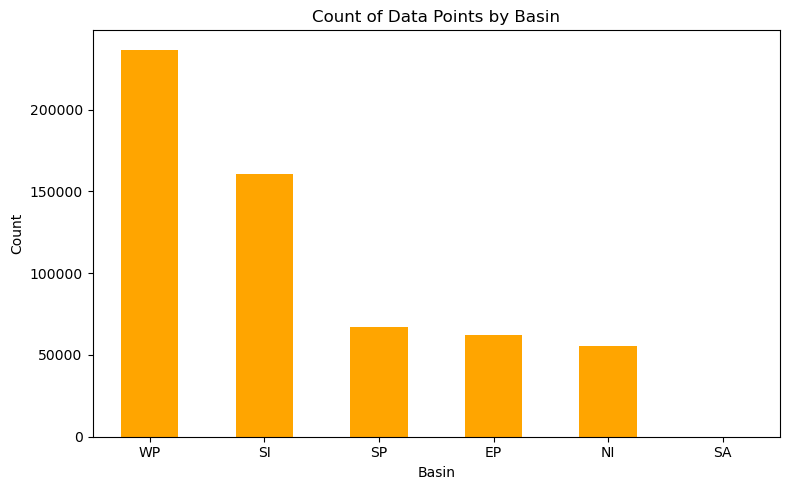

In [6]:
basin_counts = df['BASIN'].value_counts()
plt.figure(figsize=(8, 5))
basin_counts.plot(kind='bar', color='orange')
plt.title('Count of Data Points by Basin')
plt.xlabel('Basin')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

3.4 [5 points] Make a hexbin plot of the location of datapoints in Latitude and Longitude.

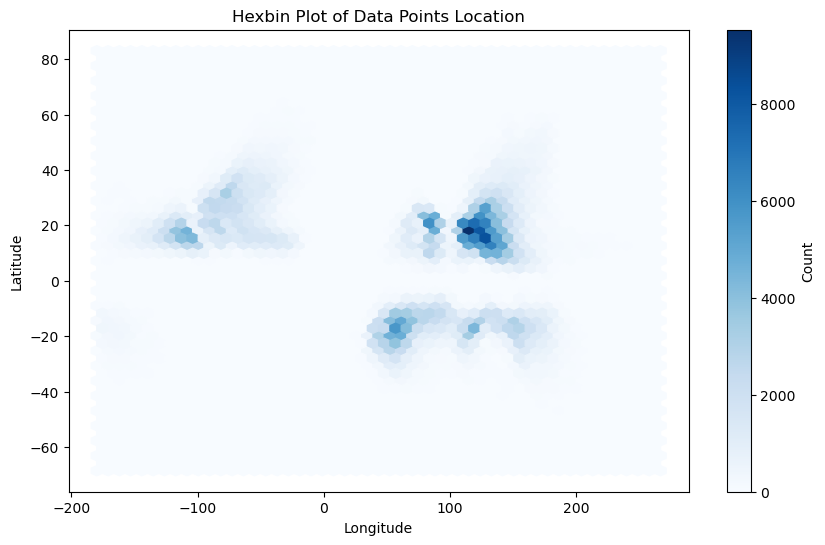

In [9]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Data Points Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

3.5 [5 points] Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.

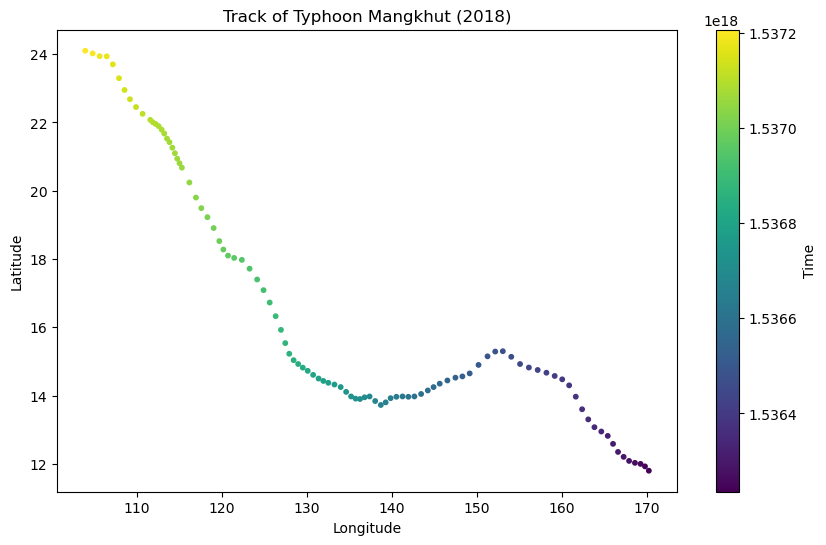

In [10]:
mangkhut = df[(df['NAME'] == 'MANGKHUT') & (df['SEASON'] == 2018)]

plt.figure(figsize=(10, 6))
plt.scatter(mangkhut['LON'], mangkhut['LAT'], c=mangkhut['ISO_TIME'], cmap='viridis', s=10)
plt.colorbar(label='Time')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

3.6 [5 points] Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.

In [11]:
# Convert 'ISO_TIME' to datetime to allow for filtering and extract 'SEASON' as integer to filter by year
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')
df['SEASON'] = pd.to_numeric(df['SEASON'], errors='coerce')

# Filter data from 1970 onwards and only for the 'WP' and 'EP' basins
filtered_data = df[(df['SEASON'] >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]

# Display the filtered data for a quick check
filtered_data.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179,_OO___________


3.7 [5 points] Plot the number of datapoints per day.

C:\Users\Wang XK\AppData\Local\Temp\ipykernel_55664\625002719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = filtered_data['ISO_TIME'].dt.date


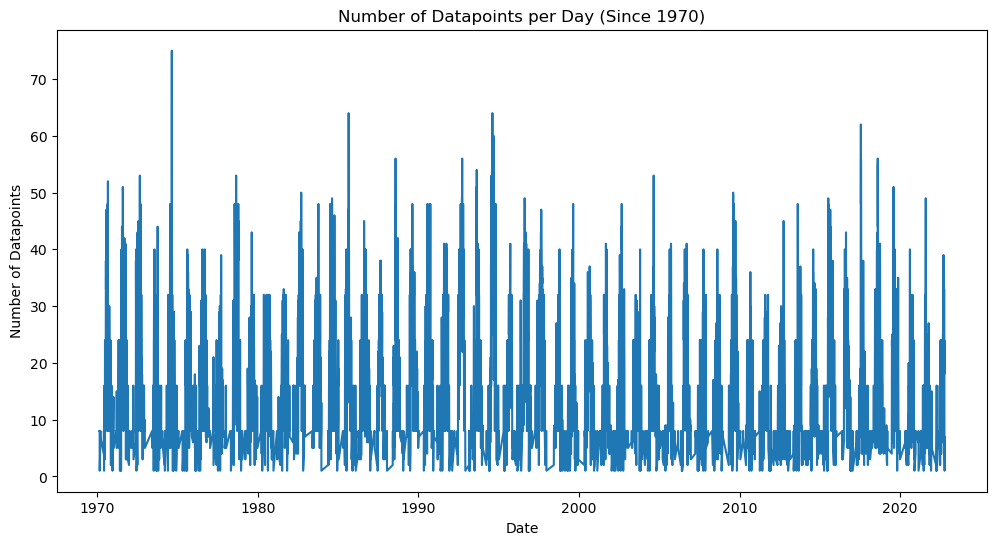

In [12]:
# Extract the date without time component for daily grouping
filtered_data['Date'] = filtered_data['ISO_TIME'].dt.date

# Group by date to count the number of data points per day
daily_counts = filtered_data.groupby('Date').size()

# Plot the number of data points per day
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line')
plt.title('Number of Datapoints per Day (Since 1970)')
plt.xlabel('Date')
plt.ylabel('Number of Datapoints')
plt.show()

3.8 [5 points] Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.

C:\Users\Wang XK\AppData\Local\Temp\ipykernel_55664\2593595767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DayOfYear'] = filtered_data['ISO_TIME'].dt.dayofyear


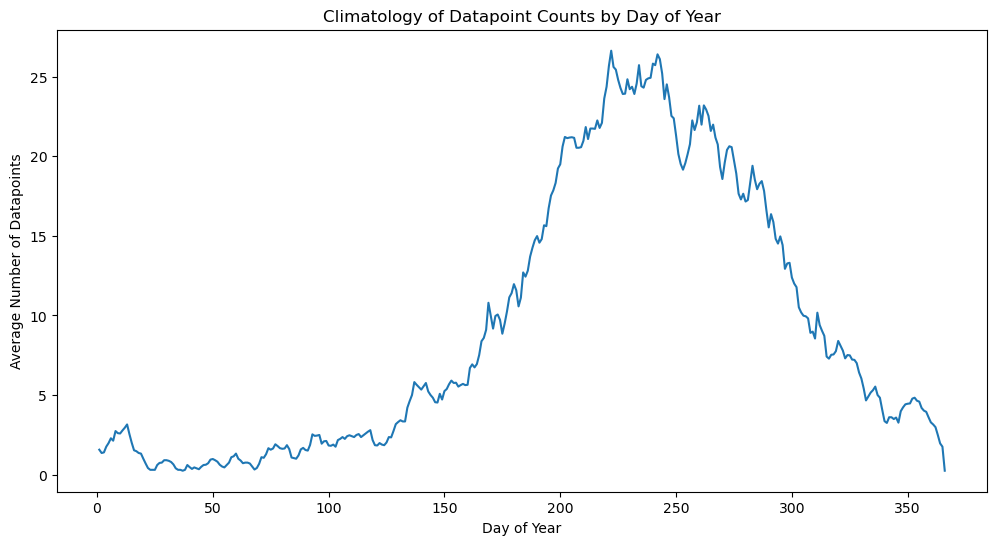

In [13]:
# Extract day of the year from the date for climatology calculation
filtered_data['DayOfYear'] = filtered_data['ISO_TIME'].dt.dayofyear

# Group by day of year to calculate the mean number of datapoints for each day (climatology)
climatology = filtered_data.groupby('DayOfYear').size() / filtered_data['SEASON'].nunique()
### Note: 筛选后的数据日期从1970-02-19到2022-10-12，直接除并不是最精确的，不是所有日期的计数都一样

# Plot the climatology of datapoint counts
plt.figure(figsize=(12, 6))
climatology.plot(kind='line')
plt.title('Climatology of Datapoint Counts by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Average Number of Datapoints')
plt.show()

3.9 [5 points] Calculate the anomaly of daily counts from the climatology.

C:\Users\Wang XK\AppData\Local\Temp\ipykernel_55664\2640844725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DailyCount'] = filtered_data['Date'].map(daily_counts)
C:\Users\Wang XK\AppData\Local\Temp\ipykernel_55664\2640844725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Anomaly'] = filtered_data['DailyCount'] - filtered_data['DayOfYear'].map(climatology)


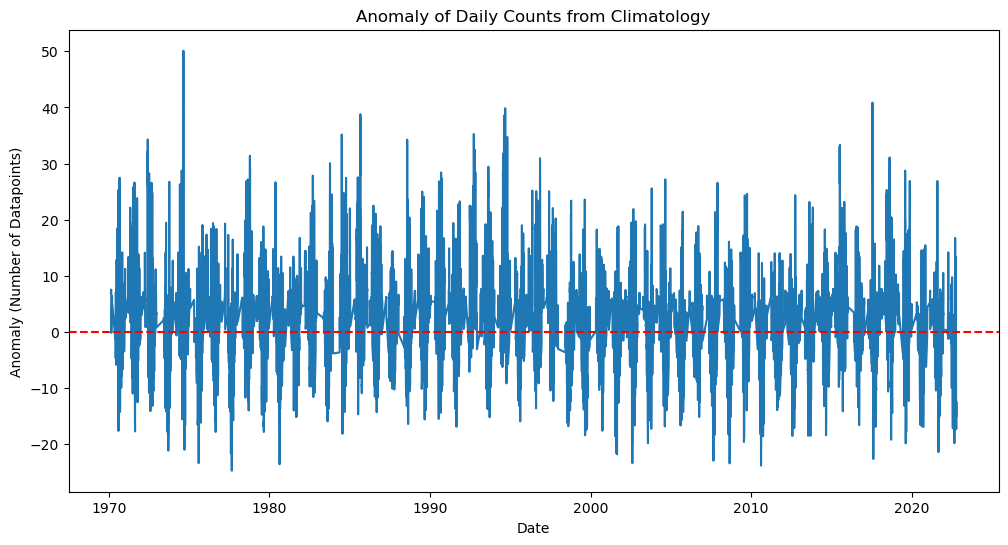

In [14]:
# Merge daily counts with climatology to calculate the anomaly
filtered_data['DailyCount'] = filtered_data['Date'].map(daily_counts)
filtered_data['Anomaly'] = filtered_data['DailyCount'] - filtered_data['DayOfYear'].map(climatology)

# Group by date again to get unique anomalies per day
daily_anomalies = filtered_data.groupby('Date')['Anomaly'].first()

# Plot the anomaly of daily counts from the climatology
plt.figure(figsize=(12, 6))
daily_anomalies.plot(kind='line')
plt.title('Anomaly of Daily Counts from Climatology')
plt.xlabel('Date')
plt.ylabel('Anomaly (Number of Datapoints)')
plt.axhline(0, color='red', linestyle='--')  # Zero line for reference
plt.show()

3.10 [5 points] Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?

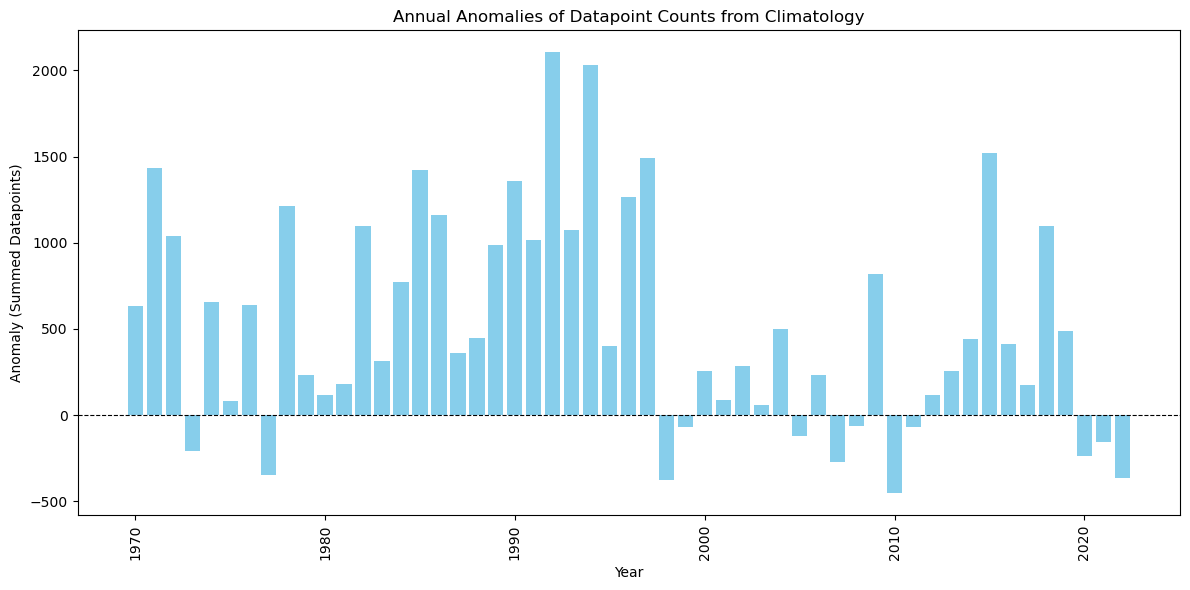

In [15]:
import numpy as np
daily_anomalies = filtered_data.groupby('Date')['Anomaly'].first()
daily_anomalies.index = pd.to_datetime(daily_anomalies.index)

# Resample anomalies at annual resolution by summing
annual_anomalies = daily_anomalies.resample('Y').sum()
# Plot the annual anomalies
plt.figure(figsize=(12, 6))
#annual_anomalies.plot(kind='bar', color='skyblue')
plt.bar(annual_anomalies.index.year, annual_anomalies, color='skyblue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a line at y=0 for reference
plt.title('Annual Anomalies of Datapoint Counts from Climatology')
plt.xlabel('Year')
plt.ylabel('Anomaly (Summed Datapoints)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Note: 没有回答题目问题奥~

So which `x` yields the maximum of `Number_of_ways`? [ Your answer ]

[ 可以在这里添加第三题解释 ]

# 4. Explore a data set

Browse the National Centers for Environmental Information (NCEI) or Advanced Global Atmospheric Gases Experiment (AGAGE) website. Search and download a data set you are interested in. You are also welcome to use data from your group in this problem set. But the data set should be in csv, XLS, or XLSX format, and have temporal information.

4.1 [5 points] Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.

https://www.ncei.noaa.gov/access/monitoring/snow-and-ice-extent/sea-ice/G/0

In [16]:
import pandas as pd
# Load the CSV file
sea_ice = pd.read_csv('Global_Sea_Ice_Extent.csv')
sea_ice.info()
#Filter out missing values
new_sea_ice = sea_ice[(sea_ice['Value'] != -9999) & (sea_ice['Anomaly'] != -9999) ].copy()
new_sea_ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          549 non-null    int64  
 1   Value         549 non-null    float64
 2   Anomaly       549 non-null    float64
 3   Monthly Mean  549 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 17.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 548
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          547 non-null    int64  
 1   Value         547 non-null    float64
 2   Anomaly       547 non-null    float64
 3   Monthly Mean  547 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 21.4 KB


4.2 [5 points] Plot the time series of a certain variable.

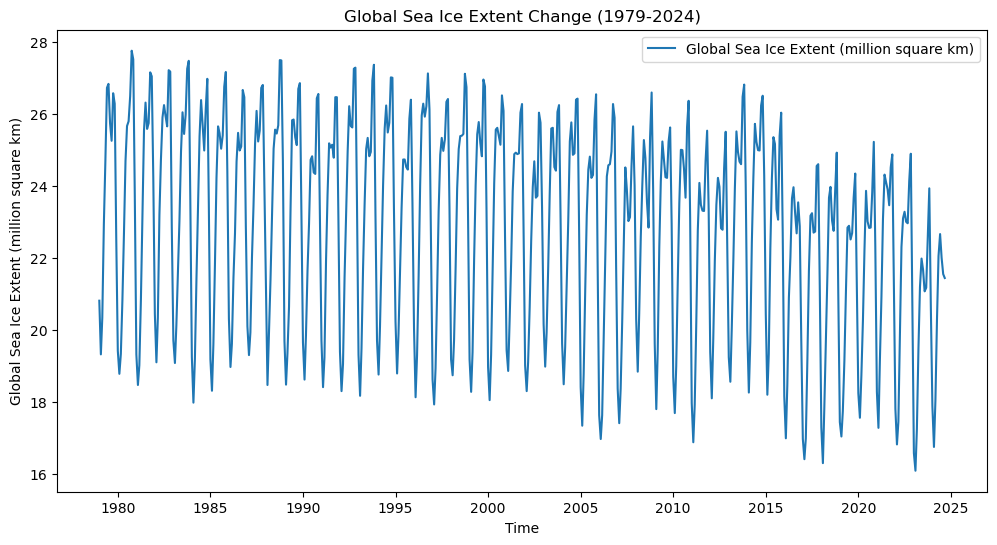

In [24]:
import matplotlib.pyplot as plt

# Convert the date column to datetime
new_sea_ice['new_Date'] = pd.to_datetime(new_sea_ice['Date'], format='%Y%m')  
# Set the date column as the index
new_sea_ice.set_index('new_Date', inplace=True)

# Plot the time series 
plt.figure(figsize=(12, 6))
plt.plot(new_sea_ice['Value'], label='Global Sea Ice Extent (million square km)') 
plt.title('Global Sea Ice Extent Change (1979-2024)')
plt.xlabel('Time')
plt.ylabel('Global Sea Ice Extent (million square km)')
plt.legend()
plt.show()

The plot shows the monthly averaged sea ice extent from 1979 to 2024 September globally. A visible trend is evident, with some fluctuations across years. This long-term data suggests potential global warming, as global sea ice extent declines gradually over the 45-year period.

4.3 [5 points] Conduct at least 5 simple statistical checks with the variable, and report your findings.

In [18]:
# Descriptive statistics
min_value = new_sea_ice['Value'].min()
max_value = new_sea_ice['Value'].max()
mean_value = new_sea_ice['Value'].mean()
median_value = new_sea_ice['Value'].median()
std_dev =new_sea_ice['Value'].std()
variance = new_sea_ice['Value'].var()
count_non_missing =new_sea_ice['Value'].count()

# Reporting findings
print(f'Minimum: {min_value}')
print(f'Maximum: {max_value}')
print(f'Mean: {mean_value}')
print(f'Median: {median_value}')
print(f'Standard Deviation: {std_dev}')
print(f'Variance: {variance}')
print(f'Count of Non-Missing Values: {count_non_missing}')

Minimum: 16.09
Maximum: 27.75
Mean: 22.838756855575845
Median: 23.35
Standard Deviation: 2.878115402240038
Variance: 8.283548268611336
Count of Non-Missing Values: 547


The global sea ice content ranges from 16.09 to 27.75 from 1979 to 2014, the mean value is 22.838 and the median is 23.35. Due to the marked seasonality as depicted in 4.2, it has a relatively high variance(8.28) and standard deviation(2.878),

[ 本题下载的数据为1979-2024年9月全球海冰逐月面积、anomaly，网址见4.1。通过浏览整个csv文件，发现共计有549组数据，其中有缺失值(-9999),需要先将其剔除。4.2中可以看出明显的季节性和年纪变化，主要与气候变化有关。4.3共计算了最大值、最小值、平均数、中位数、方差、标准差以及无缺失值的数据数量。 ]